In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [12]:
#Reading an image
img = mpimg.imread('/content/drive/MyDrive/image_encryption_using_LCT/lena.png')
#print(img)
#plt.imshow(img)
#plt.show()

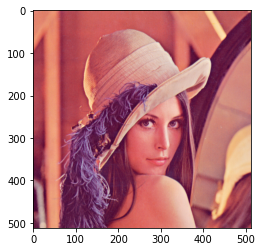

In [13]:
height = img.shape[0]
width = img.shape[1]

img2 = np.zeros_like(img)
for i in range(height):
  for j in range(width):
    img2[i,j] = img[i,j]*255

img2 = img2.astype(int)
#print(img2)
plt.imshow(img2)
plt.show()

In [14]:
#Function to generate chaotic keys
def keygen(x,r,size):
  key = []
  for i in range(size):
    x = r*x*(1-x)
    key.append(int(x*pow(10,16))%512)
  return key

In [15]:
#Generating chaotic keys for sample image
key = keygen(0.01, 3.95, height*width)
#print(key)
print(len(key))


262144


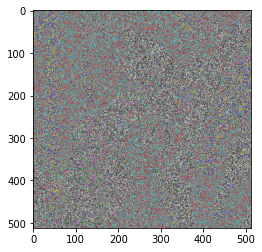

In [16]:
#Encryption-substitution with XOR
z=0
enimg = np.zeros(shape=[height, width, 3], dtype=np.uint8)
for i in range(height):
  for j in range(width):
    #pixel value is XORed with key
    enimg[i,j] = img2[i,j]^key[z]
    z+=1

#print(enimg)
plt.imshow(enimg)
plt.show()
plt.imsave('/content/drive/MyDrive/image_encryption_using_LCT/EncryptedLena.bmp', enimg)

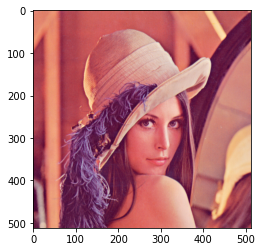

In [17]:
#Decryption
z=0
decimg = np.zeros(shape=[height,width,3], dtype=np.uint8)
for i in range(height):
  for j in range(width):
    #pixel value is XORed with key
    decimg[i,j] = enimg[i,j]^key[z]
    z+=1

#print(decimg)
plt.imshow(decimg)
plt.show()
plt.imsave('/content/drive/MyDrive/image_encryption_using_LCT/DecryptedLena.bmp', decimg)

In [18]:
def sqr_err(decimg, img):

    mse = np.zeros_like(img)
    h = img.shape[0]
    w = img.shape[1]
    for i in range(h):
      for j in range(w):
        mse[i,j] = ((decimg[i,j] - img[i,j])**2)/h*w
    return mse

In [19]:
def plot_histogram(img):
  # tuple to select colors of each channel line
  colors = ("red", "green", "blue")
  channel_ids = (0, 1, 2)

  # create the histogram plot, with three lines, one for
  # each color
  plt.xlim([0, 256])
  for channel_id, c in zip(channel_ids, colors):
      histogram, bin_edges = np.histogram(img[:, :, channel_id], bins=256, range=(0, 256))
      plt.plot(bin_edges[0:-1], histogram, color=c)

  plt.xlabel("Color value")
  plt.ylabel("Pixels")

  plt.show()

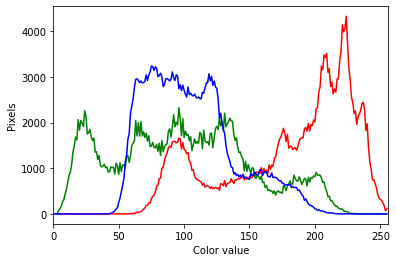

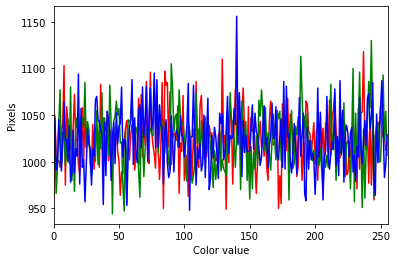

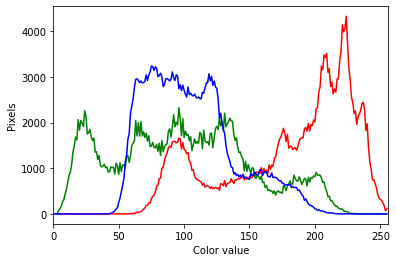

In [10]:
plot_histogram(img2)
plot_histogram(enimg)
plot_histogram(decimg)